In [91]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir = 'data'
cls_count = 5

In [3]:
generator = {
    'train': ImageDataGenerator(rescale=1. / 255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.2,
                                horizontal_flip=True, preprocessing_function=preprocess_input).flow_from_directory(directory=dir, target_size=(200, 200),subset='training'),
    'valid': ImageDataGenerator(rescale=1 / 255, validation_split=0.2, preprocessing_function=preprocess_input).flow_from_directory(directory=dir, target_size=(200, 200), subset='validation')
}

Found 4449 images belonging to 5 classes.
Found 888 images belonging to 5 classes.


In [4]:
IMG_SIZE = (200, 200, 3)

base_model = VGG16(input_shape=IMG_SIZE, weights='imagenet', include_top=False)
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
x = Flatten()(base_model.output)
x = Dense(cls_count, activation='softmax')(x)

model = Model(base_model.input, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [6]:
batch_size = 128
epochs = 10

train_generator = generator['train']
valid_generator = generator['valid']
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r = model.fit(train_generator, epochs=10, validation_data=valid_generator, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
34/34 [==============================] - 381s 11s/step - loss: 1.1359 - accuracy: 0.5689 - val_loss: 0.6822 - val_accuracy: 0.7240
Epoch 2/10
34/34 [==============================] - 325s 10s/step - loss: 0.6816 - accuracy: 0.7518 - val_loss: 0.4842 - val_accuracy: 0.8229
Epoch 3/10
34/34 [==============================] - 289s 8s/step - loss: 0.6032 - accuracy: 0.7895 - val_loss: 0.3848 - val_accuracy: 0.8750
Epoch 4/10
34/34 [==============================] - 265s 8s/step - loss: 0.5366 - accuracy: 0.8143 - val_loss: 0.4835 - val_accuracy: 0.8281
Epoch 5/10
34/34 [==============================] - 253s 7s/step - loss: 0.4576 - accuracy: 0.8272 - val_loss: 0.3753 - val_accuracy: 0.8646
Epoch 6/10
34/34 [==============================] - 247s 7s/step - loss: 0.4971 - accuracy: 0.8290 - val_loss: 0.2507 - val_accuracy: 0.9115
Epoch 7/10
34/34 [==============================] - 242s 7s/step - loss: 0.4246 - accuracy: 0.8438 - val_loss: 0.2123 - val_accuracy: 0.9427
Epoch 8/10


In [8]:
model.save('data')
loaded_model = tf.keras.models.load_model('data')

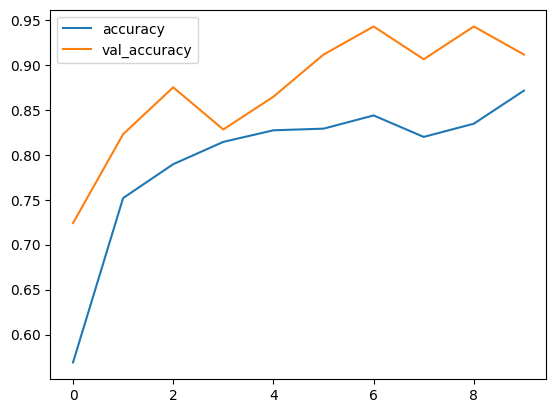

In [9]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [93]:
[f for f in os.listdir('data')]

['data.zip',
 'Butterfly',
 'Dragonfly',
 'Grasshopper',
 'Ladybird',
 'Mosquito',
 'model.keras']

In [126]:
def random_image():
  cls = ['Butterfly', 'Dragonfly', 'Grasshopper', 'Ladybird', 'Mosquito']
  dir_path = dir + '/' + np.random.choice(cls) + '/'
  img_file = [dir_path + fname for fname in os.listdir(dir_path)]
  img_file = np.random.choice(img_file)
  return img_file

In [127]:
def predict():
    img = image.load_img(random_image(), target_size=(200, 200))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0

    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    p = loaded_model.predict(np.expand_dims(img, axis=0))

    labels = {0: 'Butterfly', 1: 'Dragonfly', 2: 'Grasshopper', 3: 'Ladybird', 4: 'Mosquito'}

    print(np.max(p[0], axis=-1), labels[np.argmax(p[0], axis=-1)])

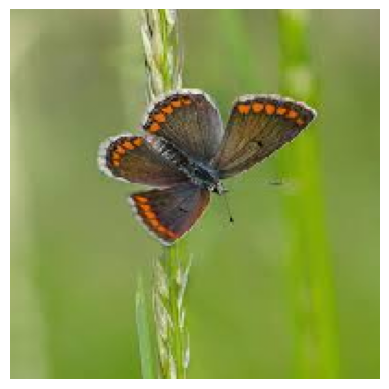

1/1 [==============================] - 1s 526ms/step
0.85590076 Butterfly


In [132]:
predict()